# 사전 학습된 CNN

In [61]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline


#https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt   

In [62]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')


#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')


#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')  

In [63]:
vgg_model.summary()    # 138,357,544
#inception_model.summary() # 23,851,784
#resnet_model.summary()  # 25,636,712
#mobilenet_model.summary() # 4,253,864

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

cnn은 무조건 4차원으로 넣어야 한다.  
영상 크기는 224 * 244로 맞춰줘야 사용 가능 (input img를 이 크기로 맞춤)  

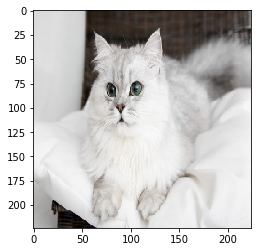

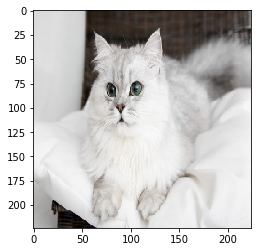

image batch size (1, 224, 224, 3)


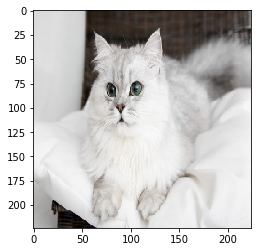

In [64]:
filename = 'img/cat.jpg'
original = load_img(filename, target_size=(224, 224))
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

======processed_image====== (1, 224, 224, 3)
float32


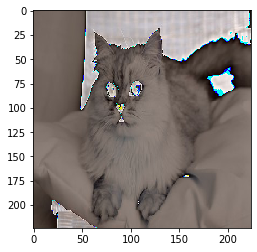

======predictions====== (1, 1000)
[[3.42162565e-08 1.22566041e-06 3.35593882e-06 2.69396878e-06
  2.49008144e-06 4.48005676e-06 2.89464197e-06 8.68035295e-06
  3.63426770e-05 6.75500416e-07 2.38927811e-07 2.16670614e-07
  2.14501074e-06 4.99262387e-06 4.98817201e-07 4.42731988e-07
  1.48355423e-06 4.20493525e-05 3.33630078e-06 6.39142672e-06
  1.49749451e-06 3.10122118e-06 2.27603186e-06 1.08877111e-06
  1.31695406e-05 5.65056339e-08 6.77885268e-08 5.02646515e-07
  1.48219300e-07 8.19998320e-07 1.00019030e-07 6.62811658e-07
  1.02685050e-07 7.74547360e-08 1.73452079e-07 5.62084708e-08
  2.45423053e-07 1.30062816e-07 4.26315239e-07 2.01752187e-06
  3.47519062e-06 3.31032624e-07 2.80823457e-07 3.94560772e-07
  4.38557618e-06 2.83090515e-07 1.32416271e-05 1.69562739e-07
  5.94967453e-08 1.62860175e-07 9.29038094e-07 5.86607371e-07
  9.31738157e-07 6.76395757e-07 4.51032861e-07 9.49381331e-07
  4.20270965e-07 1.30728125e-07 3.80710759e-07 2.69915563e-06
  1.93015694e-06 1.22955839e-07 5.38

In [65]:
processed_image = vgg16.preprocess_input(image_batch.copy())
#input:각 모델마다 있음 #변경될 수도 있으니 안전하게 copy함
print('======processed_image======',processed_image.shape)
print(processed_image.dtype)
plt.imshow(np.uint8(processed_image[0]), cmap="gray")
plt.show()
predictions = vgg_model.predict(processed_image)
#predict는 그냥 마지막까지 계산하라는 의미. processed image 아닌 것 넣어도 큰 차이 없어.
print('======predictions======',predictions.shape)
print(predictions)
label_vgg = decode_predictions(predictions, top=10) #확률값 상위 10개의 label 가져와
#확률값에서 맥시멈아이디 찾은 다음에 그것의 label을 가져오는 함수. (계산하는 건 아님)
print('======label_vgg======',label_vgg)

In [15]:
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n02123394', 'Persian_cat', 0.27803516),
  ('n02127052', 'lynx', 0.27067396),
  ('n04493381', 'tub', 0.08564318)]]

In [16]:
processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[('n02123394', 'Persian_cat', 0.88969684),
  ('n02127052', 'lynx', 0.078016385),
  ('n15075141', 'toilet_tissue', 0.0039789206),
  ('n02328150', 'Angora', 0.003258054),
  ('n03958227', 'plastic_bag', 0.001995892)]]

In [23]:
filename = 'img/cat.jpg'
original = load_img(filename, target_size=(299, 299))
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = inception_v3.preprocess_input(image_batch.copy())
predictions = inception_model.predict(processed_image)
label_inception = decode_predictions(predictions)
label_inception

[[('n02123394', 'Persian_cat', 0.6742712),
  ('n02127052', 'lynx', 0.07873011),
  ('n04447861', 'toilet_seat', 0.012816058),
  ('n02328150', 'Angora', 0.012419724),
  ('n04553703', 'washbasin', 0.009446613)]]

In [24]:
import cv2
img = cv2.imread("img/cat.jpg")
img = cv2.resize(img, (1000,1000))
cv2.putText(img, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.imwrite("pretrainedcnn_out.jpg", img)

True

### include_top=False
CNN(특징추출만 해주는것) DNN은 제외하고

default:True.  
top 포함 안 하면 데이터 좀 더 작아  
block5_pool (MaxPooling2D) 레이어에서 끝나.  

include_top은 상단의 F.C 레이어를 포함할 것인이 아닌지 결정하는 파라미터이다.  
나는 classifier를 새로 만들었기 때문에 include_top을 False로 주었다.  



In [25]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet', include_top=False)


#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet', include_top=False)


#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet', include_top=False)
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet', include_top=False)  

87916544/87910968 [==============================] - 77s 1us/step


C:\Users\student\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 31s 0us/step


C:\Users\student\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 4s 0us/step


In [26]:
vgg_model.summary()    # 138,357,544
#inception_model.summary() # 23,851,784
#resnet_model.summary()  # 25,636,712
#mobilenet_model.summary() # 4,253,864

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

## 위 과정을 일반화
특정 영상을 하드코딩해서
각각 분류기에서 어떤 걸로 인식했고 그떄의 확률이 무엇인지 출력하는 코팅을 했잖아
이걸 일반화시켜봐

폴더에 임의의 사진들이 들어있고
아웃풋은 사진갯수만큼 위의 아웃풋이 나와야해

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [142]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
        'pretrainedcnntest/test',
        target_size=(224, 224), #이걸 맞추는게 포인트
        batch_size=10, 
        class_mode='binary', shuffle=False)
X,T = test_generator.next()

Found 6 images belonging to 1 classes.


In [148]:
label_vgg = decode_predictions(
    vgg_model.predict(
        vgg16.preprocess_input(X.copy())), top=3)
label_resnet= decode_predictions(
    resnet_model.predict(
        resnet50.preprocess_input(X.copy())), top=3)
label_mobilenet = decode_predictions(
    mobilenet_model.predict(
        mobilenet.preprocess_input(X.copy())), top=3)
#label_inception = decode_predictions(inception_model.predict(inception_v3.preprocess_input(X.copy())), top=3)


In [150]:
import cv2
for i in range(X.shape[0]):
    img = cv2.resize(X[i], (1000, 1000))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    cv2.putText(img, "VGG16: {}, {:.2f}".format(label_vgg[i][0][1], label_vgg[i][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.putText(img, "MobileNet: {}, {:.2f}".format(label_mobilenet[i][0][1], label_mobilenet[i][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.putText(img, "ResNet50: {}, {:.2f}".format(label_resnet[i][0][1], label_resnet[i][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
#    cv2.putText(img, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
    cv2.imwrite(f"pretrainedcnntest/out_{i}.jpg", img)

In [151]:
label_vgg

[[('n04252077', 'snowmobile', 0.07623135),
  ('n04019541', 'puck', 0.07400705),
  ('n04296562', 'stage', 0.048064392)],
 [('n04311174', 'steel_drum', 0.3219724),
  ('n04296562', 'stage', 0.052533813),
  ('n03249569', 'drum', 0.044149376)],
 [('n02123394', 'Persian_cat', 0.18526235),
  ('n04553703', 'washbasin', 0.1376145),
  ('n02127052', 'lynx', 0.11687113)],
 [('n02894605', 'breakwater', 0.6311175),
  ('n09428293', 'seashore', 0.13598204),
  ('n09332890', 'lakeside', 0.099348724)],
 [('n03344393', 'fireboat', 0.20857525),
  ('n04483307', 'trimaran', 0.13107927),
  ('n03216828', 'dock', 0.07575023)],
 [('n02894605', 'breakwater', 0.44950613),
  ('n04347754', 'submarine', 0.060765415),
  ('n02687172', 'aircraft_carrier', 0.052677933)]]

In [152]:
label_vgg[0]

[('n04252077', 'snowmobile', 0.07623135),
 ('n04019541', 'puck', 0.07400705),
 ('n04296562', 'stage', 0.048064392)]